In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# **Dữ liệu gốc**

In [ ]:
# Đọc dữ liệu từ file CSV tích cực
file_path1 = '/content/drive/MyDrive/XLDL/data_v3/positive.csv'
data_positive_df = pd.read_csv(file_path1)

# Kiểm tra cấu trúc dữ liệu
print("Dữ liệu tích cực trước khi tiền xử lý:")
print(data_positive_df.head(10))

# Đọc dữ liệu từ file CSV
file_path2 = '/content/drive/MyDrive/XLDL/data_v3/negative.csv'
data_negative_df = pd.read_csv(file_path2)

# Kiểm tra cấu trúc dữ liệu
print("\nDữ liệu tiêu cực trước khi tiền xử lý:")
print(data_negative_df.head(10))

Dữ liệu tích cực trước khi tiền xử lý:
                                             comment  label
0                             Rất ưng  còn rẻ nữa ❤️      0
1  Đóng gói cha chắc chắn sp rất đáng tiền giao h...      0
2              Hàng rất tốt! Giao hàng cũng lịch sự!      0
3  Shop giao hàng nhanh. Chuột đẹp hơi to với tay...      0
4   Chất lượng sản phẩm tuyệt vời, đẹp, nhưng mặt...      0
5                     Hàng chuẩn. Đẹp lắm. Cám ơn sh      0
6                     Đúng là danh bất hư truyền ...      0
7                     "Nhìn hoàn thiện có vẻ đc nhỉ"      0
8                       Giá tốt sản phẩm chính hãng.      0
9  Chất lượng tuyệt vời bao bì đẹp chủ shop yêu y...      0

Dữ liệu tiêu cực trước khi tiền xử lý:
                                             comment  label
0  Tôi đã đặt mua sản phẩm này. Mất đến 5 ngày để...      1
1  Shop lừa đảo treo đầu dê bán thịt chó địt mẹ c...      1
2  "hàng SAM kém lắm hết bảo hành là lăn quay. nh...      1
3  Dở hơn sữa vinamil

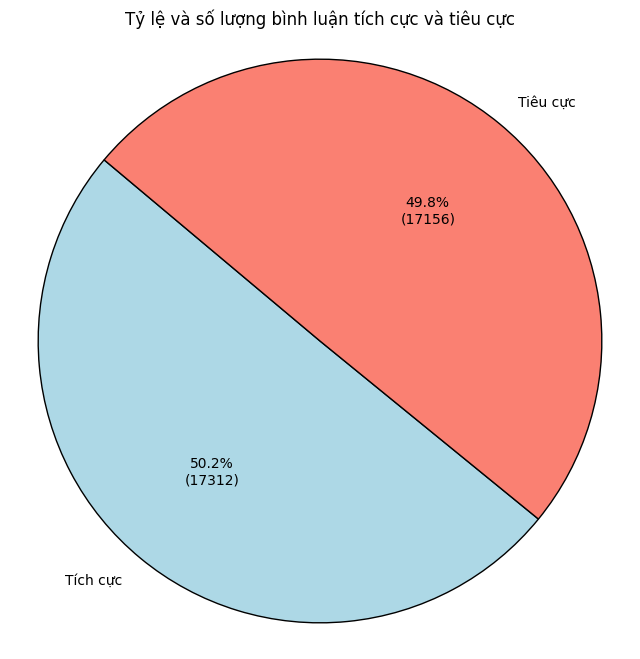

In [2]:

# Đếm số lượng mỗi loại
# positive_count = len(data_positive_df)
# negative_count = len(data_negative_df)
positive_count = 17312
negative_count = 17156
# Danh sách số lượng và nhãn
counts = [positive_count, negative_count]
labels = ['Tích cực', 'Tiêu cực']

# Hàm hiển thị cả phần trăm và số lượng
def autopct_with_count(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: autopct_with_count(pct, counts),
    startangle=140,
    colors=['lightblue', 'salmon'],
    wedgeprops={'edgecolor': 'black'}  # Thêm viền màu đen
)
plt.title('Tỷ lệ và số lượng bình luận tích cực và tiêu cực')
plt.axis('equal')  # Đảm bảo hình tròn không bị méo
plt.show()

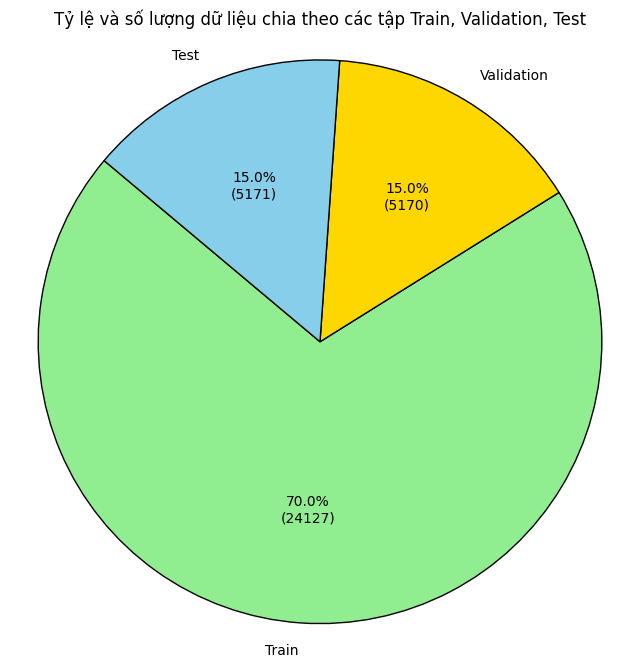

In [3]:
import matplotlib.pyplot as plt

# Tổng số bình luận
total_comments = 17312 + 17156

# Tính toán số lượng của từng tập
train_count = int(total_comments * 0.7)
val_count = int(total_comments * 0.15)
test_count = total_comments - train_count - val_count  # Phần còn lại vào tập test

# Danh sách số lượng và nhãn
counts = [train_count, val_count, test_count]
labels = ['Train', 'Validation', 'Test']

# Hàm hiển thị cả phần trăm và số lượng
def autopct_with_count(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f'{pct:.1f}%\n({absolute})'

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda pct: autopct_with_count(pct, counts),
    startangle=140,
    colors=['lightgreen', 'gold', 'skyblue'],
    wedgeprops={'edgecolor': 'black'}  # Thêm viền màu đen
)
plt.title('Tỷ lệ và số lượng dữ liệu chia theo các tập Train, Validation, Test')
plt.axis('equal')  # Đảm bảo hình tròn không bị méo
plt.show()


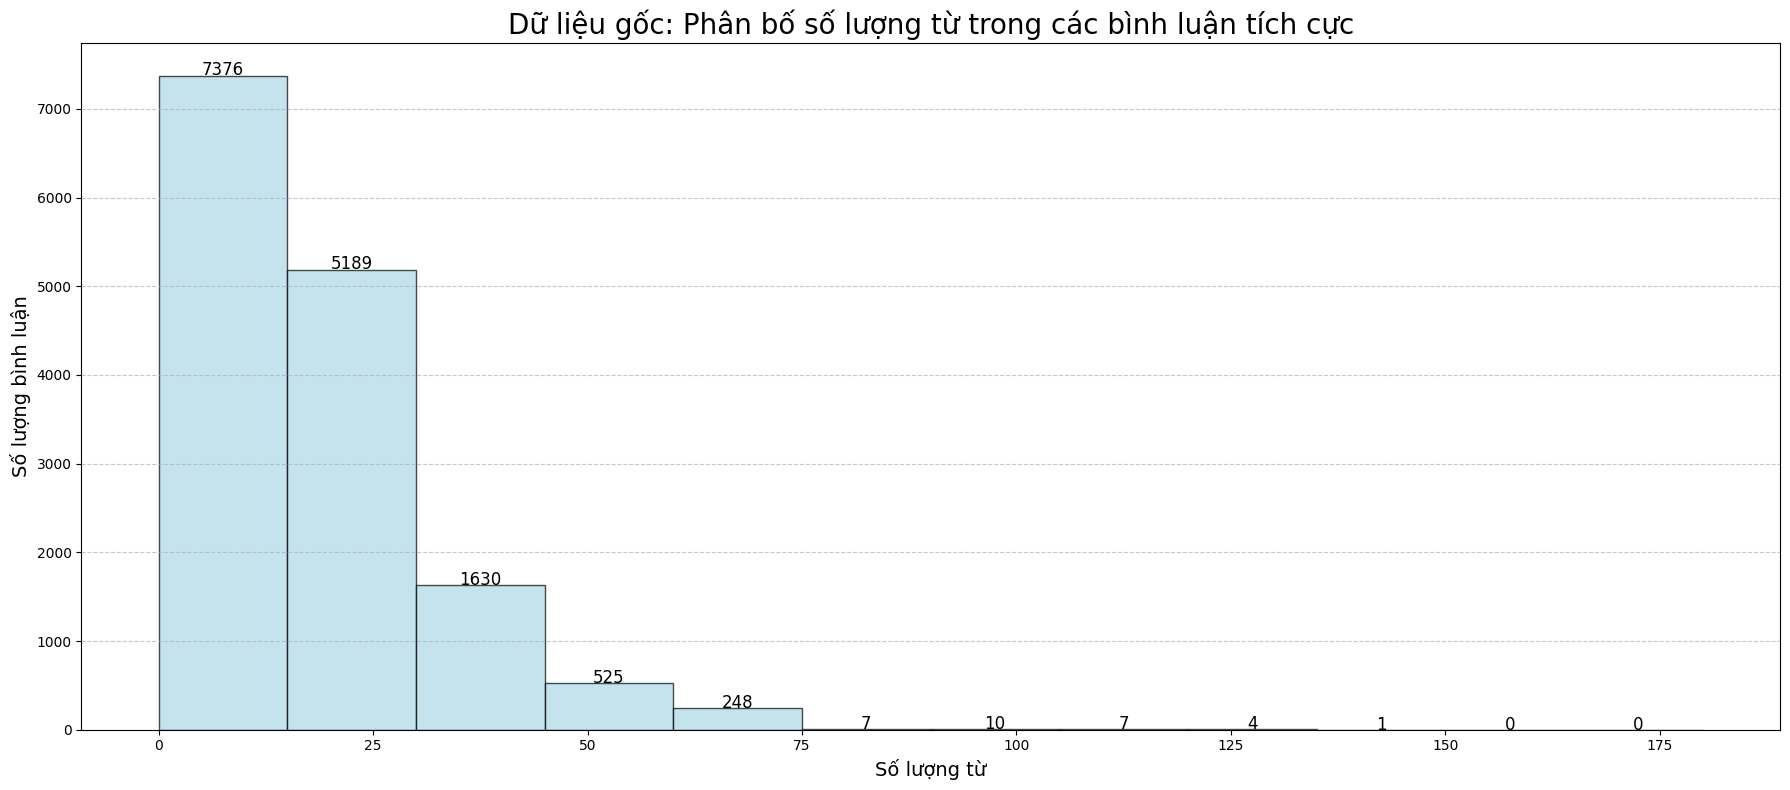

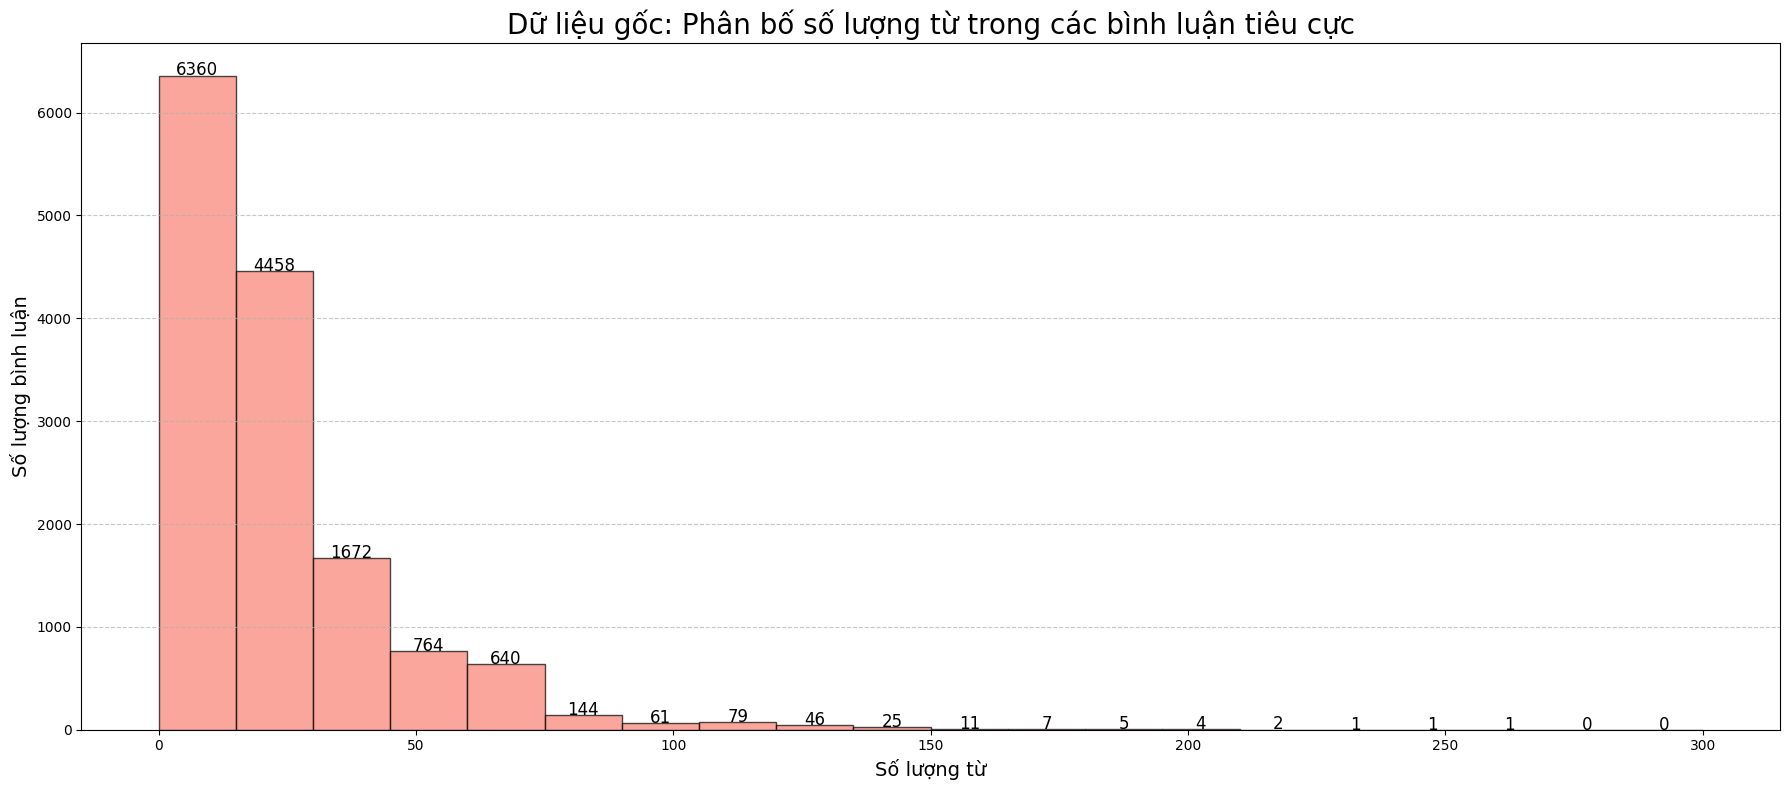

In [ ]:
# Hàm tính số lượng từ trong cột comment
def count_words(text):
    return len(str(text).split())

# Tính số lượng từ cho mỗi comment

data_positive_df = data_positive_df.copy()
data_negative_df = data_negative_df.copy()

# Thêm cột 'WordCount' như bình thường
data_positive_df['WordCount'] = data_positive_df['comment'].apply(count_words)
data_negative_df['WordCount'] = data_negative_df['comment'].apply(count_words)


# Vẽ biểu đồ phân bố số từ cho comment

plt.figure(figsize=(18, 8))  # Tạo kích thước biểu đồ
# Biểu đồ cho tập tích cực
max_word_count = max(data_positive_df['WordCount'])
bins = range(0, max_word_count + 50, 15)  # Khoảng giá trị cho từng bin
bin_width = bins[1] - bins[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_positive_df['WordCount'], bins=bins, alpha=0.7, color='lightblue', edgecolor='black', width=bin_width)
plt.title('Dữ liệu gốc: Phân bố số lượng từ trong các bình luận tích cực', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng comment trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ cho tập tiêu cực
plt.figure(figsize=(18, 8))
max_word_count_neg = max(data_negative_df['WordCount'])
bins_fake = range(0, max_word_count_neg + 50, 15)  # Khoảng giá trị cho từng bin
bin_width_fake = bins_fake[1] - bins_fake[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_negative_df['WordCount'], bins=bins_fake, alpha=0.7, color='salmon', edgecolor='black', width=bin_width_fake)
plt.title('Dữ liệu gốc: Phân bố số lượng từ trong các bình luận tiêu cực', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng comment trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width_fake / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

**Word Cloud cho bình luận tích cực**

Số lượng từ tất cả của dữ liệu bình luận tích cực gốc:  273918
Số lượng từ trong từ điển từ của dữ liệu bình luận tích cực gốc:  14346


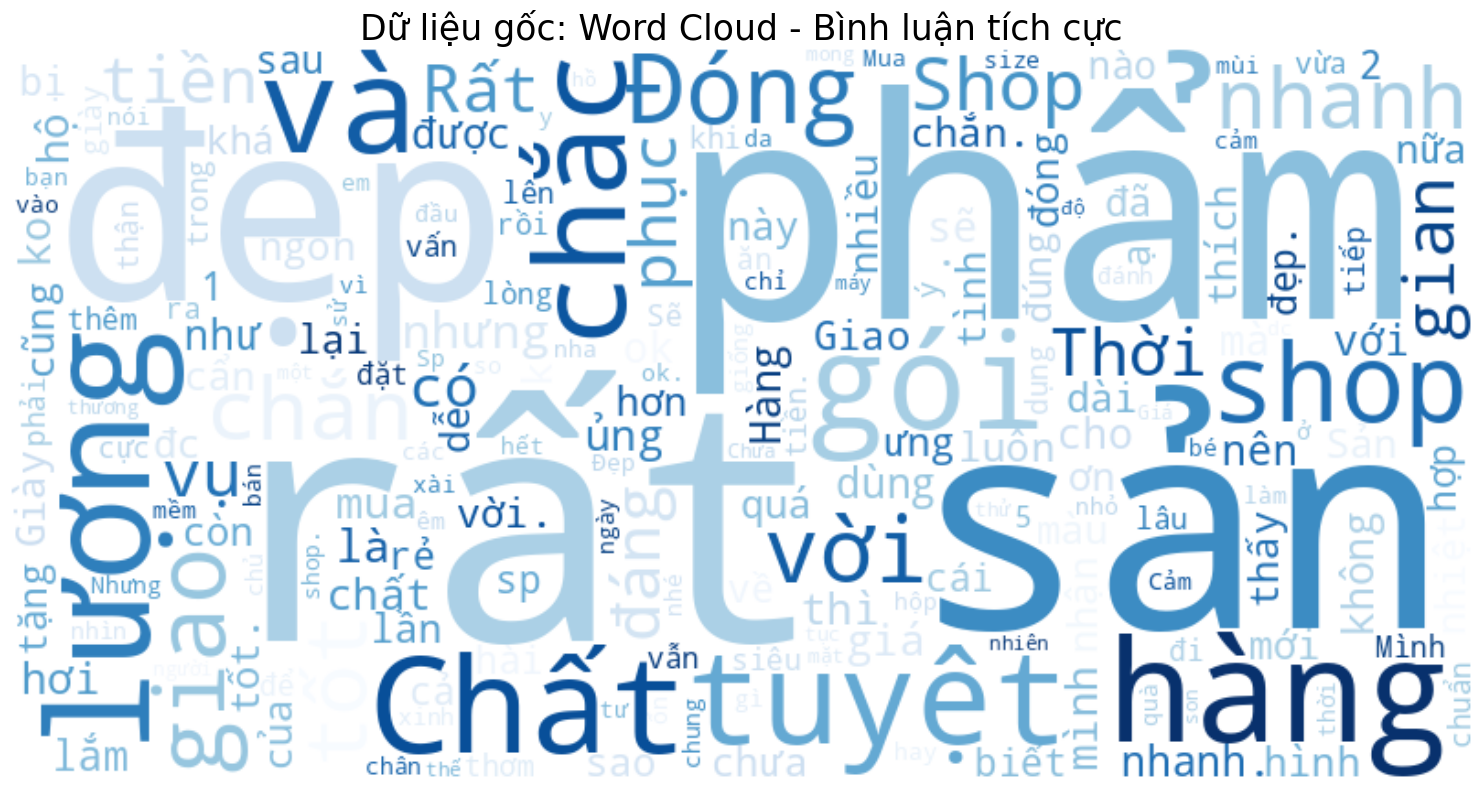

In [ ]:

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['comment'].dropna()))
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_pos = combine_text_in_batches(data_positive_df)
word_frequencies = Counter(text_pos.split())
print("Số lượng từ tất cả của dữ liệu bình luận tích cực gốc: ",len(text_pos.split()))
print("Số lượng từ trong từ điển từ của dữ liệu bình luận tích cực gốc: ",len(word_frequencies))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_frequencies)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu gốc: Word Cloud - Bình luận tích cực', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

**Word Cloud cho bình luận tiêu cực**

Số lượng từ tất cả của dữ liệu bình luận tiêu cực gốc:  329546
Số lượng từ trong từ điển từ của dữ liệu bình luận tiêu cực gốc:  18444


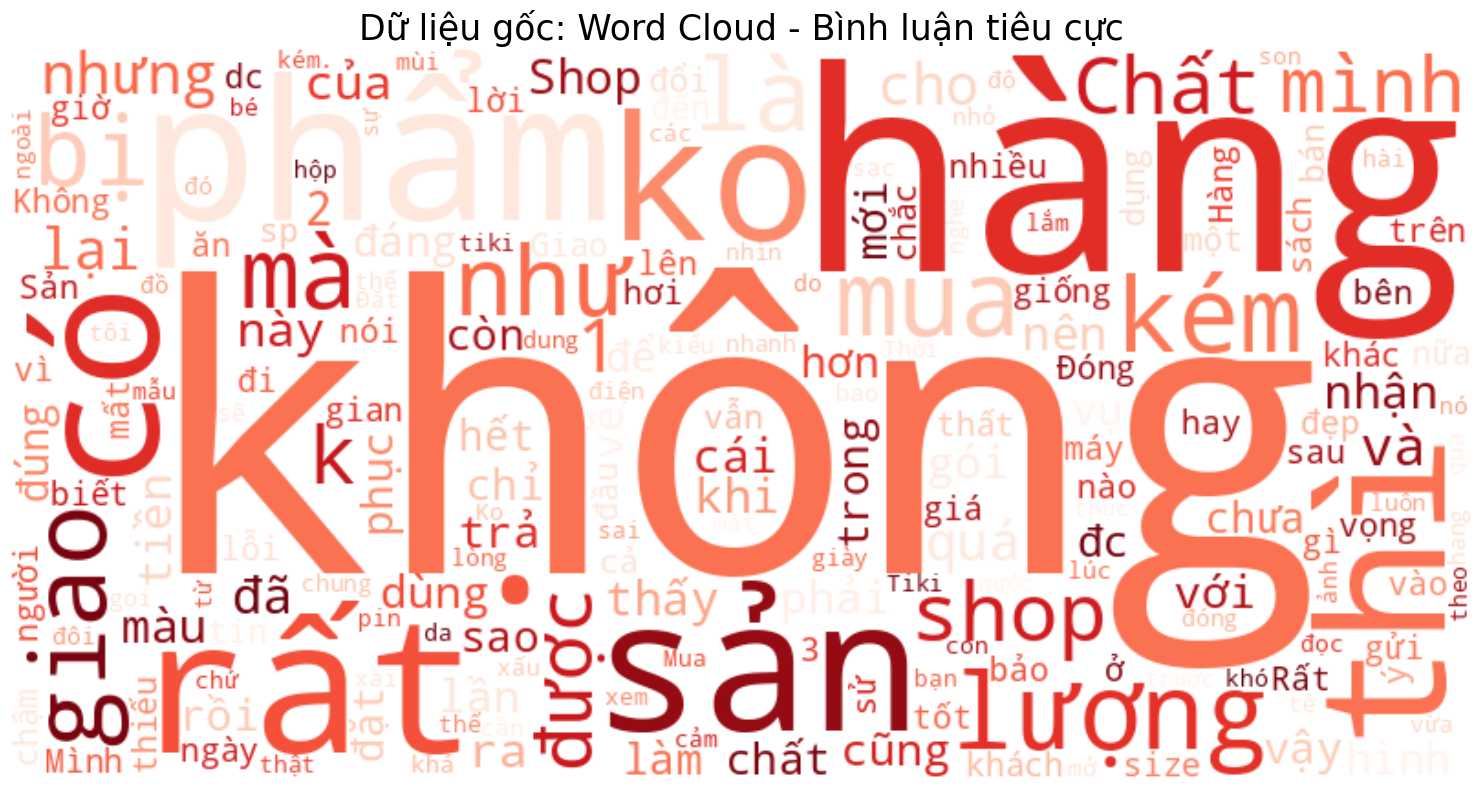

In [ ]:

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['comment'].dropna()))
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_neg = combine_text_in_batches(data_negative_df)
word_frequencies1 = Counter(text_neg.split())
print("Số lượng từ tất cả của dữ liệu bình luận tiêu cực gốc: ",len(text_neg.split()))
print("Số lượng từ trong từ điển từ của dữ liệu bình luận tiêu cực gốc: ",len(word_frequencies1))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_frequencies1)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu gốc: Word Cloud - Bình luận tiêu cực', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

# **Dữ liệu đã xử lý**

In [ ]:
# Đọc dữ liệu từ file CSV tích cực
file_path1 = '/content/drive/MyDrive/XLDL/data_v3/positive_process.csv'
data_positive_process_df = pd.read_csv(file_path1)

# Kiểm tra cấu trúc dữ liệu
print("Dữ liệu tích cực sau khi tiền xử lý:")
print(data_positive_process_df.head(10))

# Đọc dữ liệu từ file CSV
file_path2 = '/content/drive/MyDrive/XLDL/data_v3/negative_process.csv'
data_negative_process_df = pd.read_csv(file_path2)

# Kiểm tra cấu trúc dữ liệu
print("\nDữ liệu tiêu cực sau khi tiền xử lý:")
print(data_negative_process_df.head(10))

Dữ liệu tích cực sau khi tiền xử lý:
                                             comment  label
0                                     rất ưng còn rẻ      0
1  đóng_gói cha chắc_chắn sp rất đáng tiền giao h...      0
2                hàng rất tốt giao hàng cũng lịch_sự      0
3         giao hàng nhanh chuột đẹp hơi to tay 1 xíu      0
4  chất_lượng sản_phẩm tuyệt_vời đẹp nhưng mặt lớ...      0
5                       hàng chuẩn đẹp lắm cám_ơn sh      0
6                          đúng danh_bất_hư_truyền        0
7                       nhìn hoàn_thiện có_vẻ đc nhỉ      0
8                        giá tốt sản_phẩm chính hãng      0
9  chất_lượng tuyệt_vời bao_bì đẹp chủ yêu_yêu gó...      0

Dữ liệu tiêu cực sau khi tiền xử lý:
                                             comment  label
0  tôi đã đặt mua sản_phẩm mất đến 5 ngày để nhận...      1
1  lừa_đảo treo_đầu dê bán thịt chó địt mẹ vì tiền        1
2  hàng sam kém lắm hết bảo_hành lăn_quay nhà mua...      1
3  dở hơn sữa vinamilk th

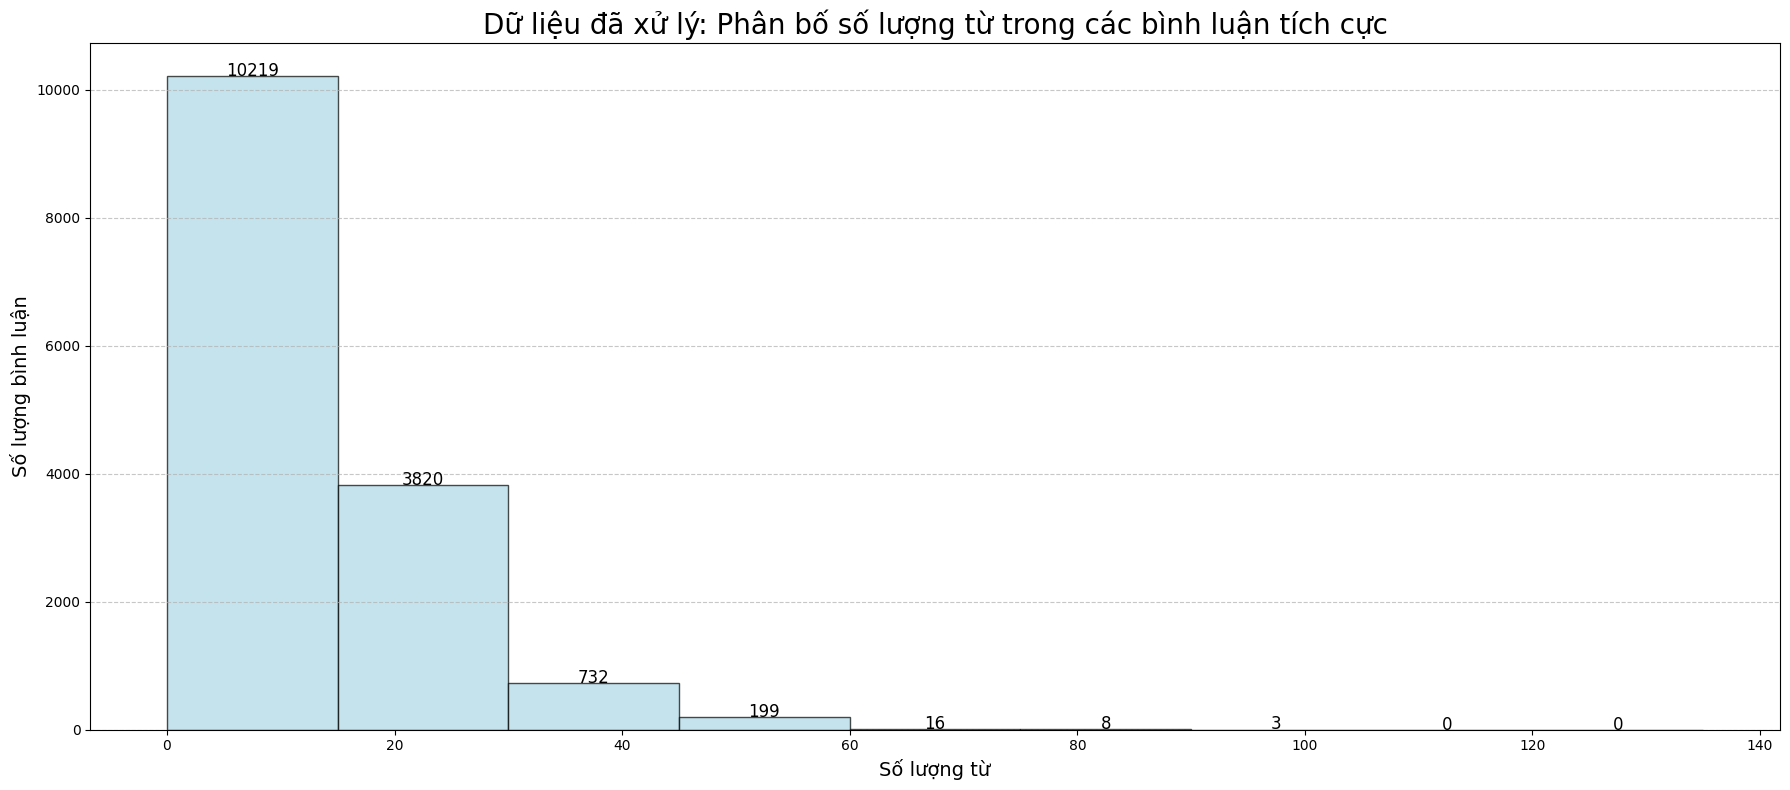

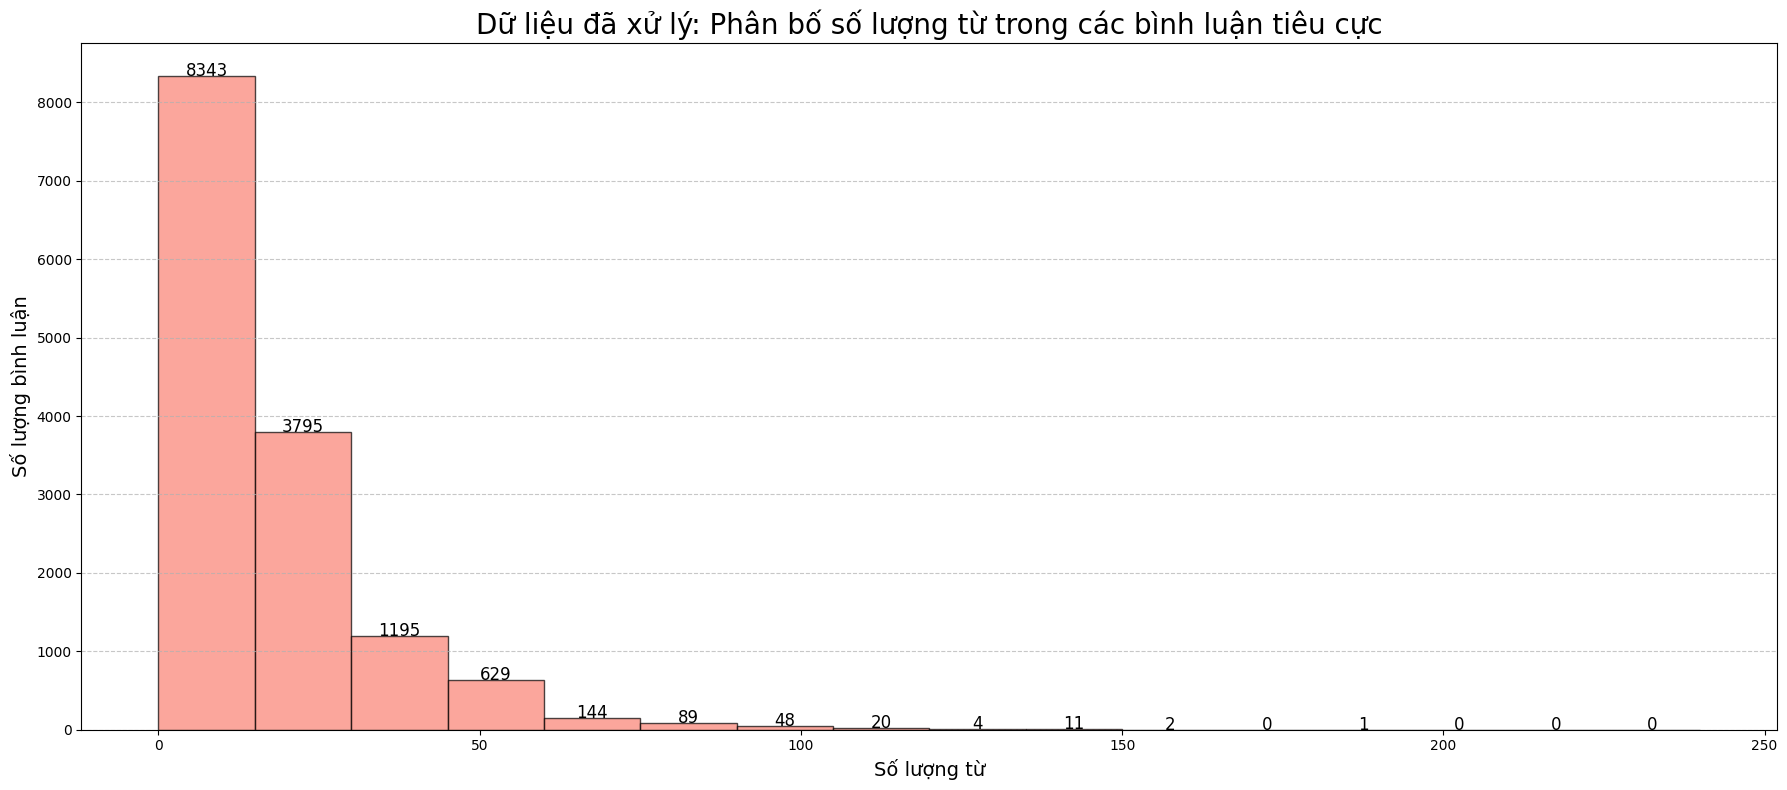

In [ ]:


# Hàm tính số lượng từ trong cột comment
def count_words(text):
    return len(str(text).split())

# Tính số lượng từ cho mỗi comment

data_positive_process_df = data_positive_process_df.copy()
data_negative_process_df = data_negative_process_df.copy()

# Thêm cột 'WordCount' như bình thường
data_positive_process_df['WordCount'] = data_positive_process_df['comment'].apply(count_words)
data_negative_process_df['WordCount'] = data_negative_process_df['comment'].apply(count_words)


# Vẽ biểu đồ phân bố số từ cho comment

plt.figure(figsize=(18, 8))  # Tạo kích thước biểu đồ
# Biểu đồ cho tập tích cực
max_word_count = max(data_positive_process_df['WordCount'])
bins = range(0, max_word_count + 50, 15)  # Khoảng giá trị cho từng bin
bin_width = bins[1] - bins[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_positive_process_df['WordCount'], bins=bins, alpha=0.7, color='lightblue', edgecolor='black', width=bin_width)
plt.title('Dữ liệu đã xử lý: Phân bố số lượng từ trong các bình luận tích cực', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng comment trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Biểu đồ cho tập tiêu cực
plt.figure(figsize=(18, 8))
max_word_count_neg = max(data_negative_process_df['WordCount'])
bins_fake = range(0, max_word_count_neg + 50, 15)  # Khoảng giá trị cho từng bin
bin_width_fake = bins_fake[1] - bins_fake[0]  # Độ rộng của mỗi cột

# Tạo histogram với độ rộng cột được điều chỉnh
hist, edges, _ = plt.hist(data_negative_process_df['WordCount'], bins=bins_fake, alpha=0.7, color='salmon', edgecolor='black', width=bin_width_fake)
plt.title('Dữ liệu đã xử lý: Phân bố số lượng từ trong các bình luận tiêu cực', fontsize=20)
plt.xlabel('Số lượng từ', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng comment trên đầu mỗi cột
for i in range(len(hist)):
    plt.text(edges[i] + bin_width_fake / 2, hist[i] + 0.5, str(int(hist[i])), ha='center', fontsize=12)
# Hiển thị biểu đồ
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

Số lượng từ tất cả của dữ liệu bình luận tích cực đã xử lý:  194384
Số lượng từ trong từ điển từ của dữ liệu bình luận tích cực đã xử lý:  9374


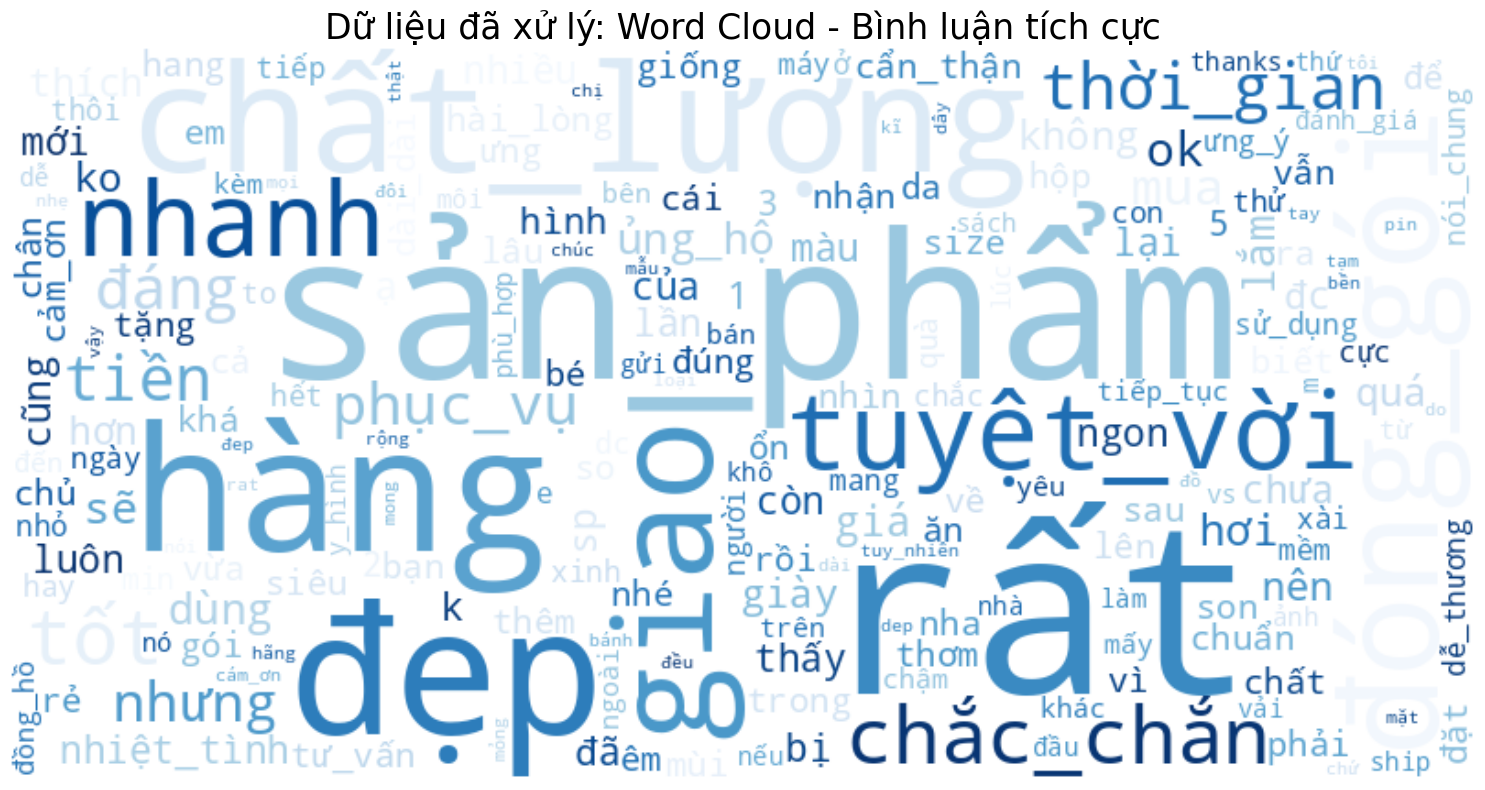

In [ ]:

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['comment'].dropna()))
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_pos = combine_text_in_batches(data_positive_process_df)
word_frequencies = Counter(text_pos.split())
print("Số lượng từ tất cả của dữ liệu bình luận tích cực đã xử lý: ",len(text_pos.split()))
print("Số lượng từ trong từ điển từ của dữ liệu bình luận tích cực đã xử lý: ",len(word_frequencies))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate_from_frequencies(word_frequencies)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu đã xử lý: Word Cloud - Bình luận tích cực', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()

Số lượng từ tất cả của dữ liệu bình luận tiêu cực đã xử lý:  245533
Số lượng từ trong từ điển từ của dữ liệu bình luận tiêu cực đã xử lý:  12775


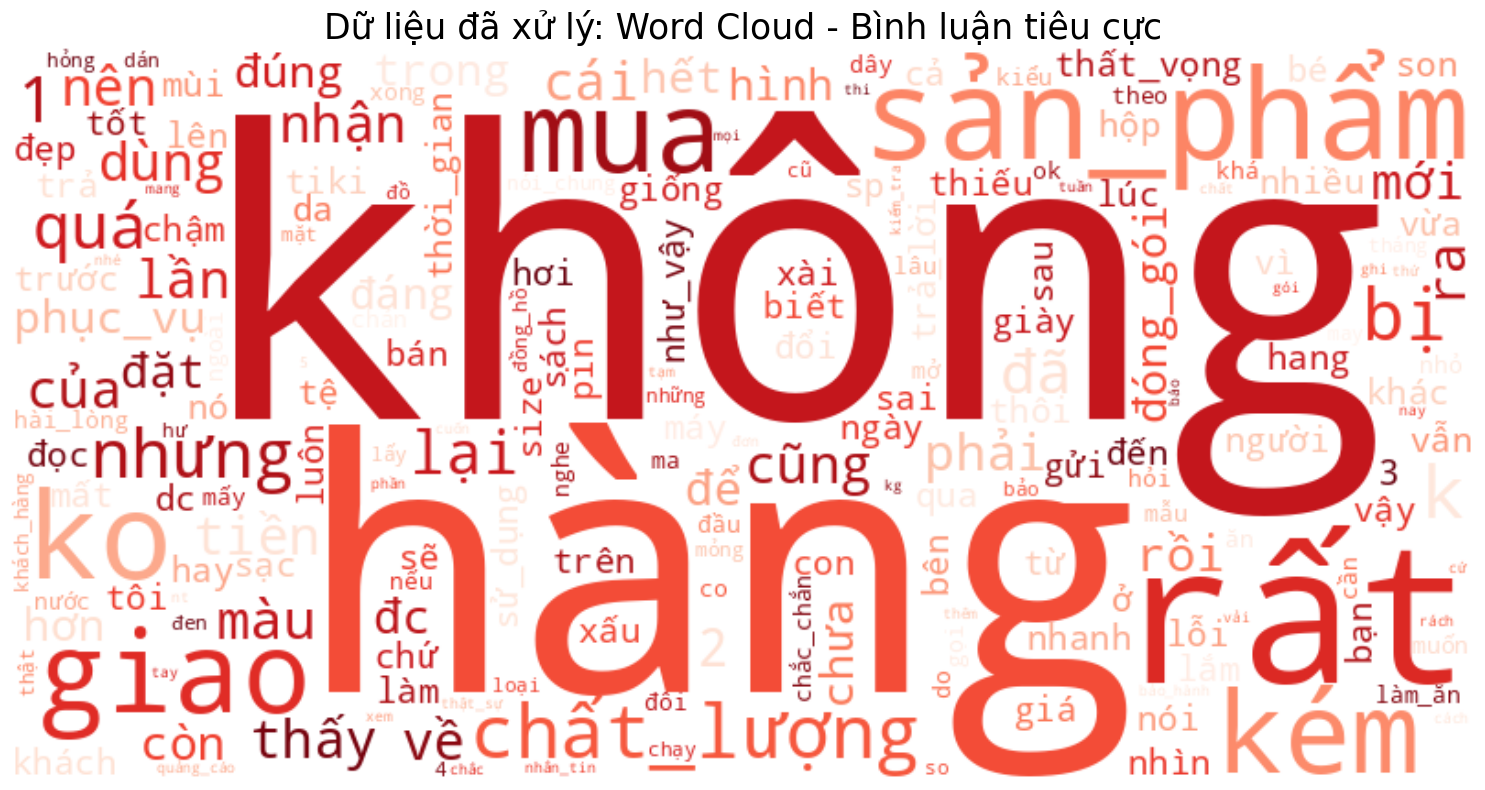

In [ ]:

# Hàm kết hợp text từng phần
def combine_text_in_batches(df, batch_size=1000):
    combined_text = []
    for i in range(0, len(df), batch_size):
        batch = df.iloc[i:i+batch_size]
        combined_text.append(' '.join(batch['comment'].dropna()))
    return ' '.join(combined_text)

# Kết hợp dữ liệu từng phần
text_neg = combine_text_in_batches(data_negative_process_df)
word_frequencies1 = Counter(text_neg.split())
print("Số lượng từ tất cả của dữ liệu bình luận tiêu cực đã xử lý: ",len(text_neg.split()))
print("Số lượng từ trong từ điển từ của dữ liệu bình luận tiêu cực đã xử lý: ",len(word_frequencies1))
# Tạo word cloud cho tin thật
# Cấu hình WordCloud
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(word_frequencies1)

# Vẽ Word Cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Dữ liệu đã xử lý: Word Cloud - Bình luận tiêu cực', fontsize=25)
plt.axis('off')
plt.tight_layout()
plt.show()